In [4]:
import pandas as pd

In [7]:
df1=pd.read_csv('input.csv')


In [ ]:
df=pd.read_csv('input.csv')
data = df[:1]['Content']

In [42]:
len(df)

401

In [1]:
from langchain_groq import ChatGroq
import os
os.environ['GROQ_API_KEY'] = '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'

llm = ChatGroq(
    model="llama3-70b-8192",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
)

In [6]:
from langchain_core.prompts import PromptTemplate

prompt=PromptTemplate.from_template(
    """ Scrapted text from website:
    {data} 
    Instruction: Please Provide information of the incident in brief way:"""
)

prompt2=PromptTemplate.from_template(
    """ Write the gist of the {data} in one line."""
)

llm_chain=prompt|llm

response=llm_chain.invoke(input={"data":data})
print(response)

content='Here is a brief summary of the incident:\n\nSix people were killed and 30 others injured in an incident.' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 53, 'total_tokens': 76, 'completion_time': 0.065714286, 'prompt_time': 0.001418165, 'queue_time': 0.055437221, 'total_time': 0.067132451}, 'model_name': 'llama3-70b-8192', 'system_fingerprint': 'fp_dd4ae1c591', 'finish_reason': 'stop', 'logprobs': None} id='run-e295e26a-d7ee-434f-b05c-b6fae6507a89-0' usage_metadata={'input_tokens': 53, 'output_tokens': 23, 'total_tokens': 76}


In [43]:
# !pip install gensim

In [42]:
# !pip install nltk

In [ ]:
import pandas as pd
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('punkt')
nltk.download('stopwords')


df = pd.read_csv("input.csv")


df['Combined_Text'] = df[['Headline', 'Content']].fillna('').agg(' '.join, axis=1)


texts = df['Combined_Text'].apply(
    lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stopwords.words('english')]
)


dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]


lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)


for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\palla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\palla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Topic 1: 0.016*"police" + 0.009*"said" + 0.008*"bus" + 0.006*"road" + 0.006*"news" + 0.006*"fire" + 0.006*"accident" + 0.006*"students" + 0.005*"also" + 0.005*"area"
Topic 2: 0.019*"road" + 0.017*"said" + 0.011*"bus" + 0.011*"news" + 0.011*"police" + 0.009*"killed" + 0.009*"accidents" + 0.009*"daily" + 0.009*"star" + 0.007*"dhaka"
Topic 3: 0.010*"said" + 0.008*"road" + 0.007*"news" + 0.006*"accident" + 0.006*"blood" + 0.005*"people" + 0.005*"daily" + 0.005*"star" + 0.004*"transport" + 0.004*"police"
Topic 4: 0.022*"injured" + 0.020*"said" + 0.020*"police" + 0.020*"killed" + 0.018*"upazila" + 0.017*"bus" + 0.015*"news" + 0.013*"road" + 0.013*"people" + 0.012*"around"
Topic 5: 0.020*"police" + 0.015*"said" + 0.014*"hospital" + 0.014*"bus" + 0.012*"news" + 0.009*"injured" + 0.009*"dhaka" + 0.008*"around" + 0.008*"road" + 0.007*"star"


In [41]:
# !pip install pyLDAvis

In [16]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)


In [17]:
for i, row in enumerate(lda_model[corpus]):
    print(f"Document {i}: Topic Distribution {row}")


Document 0: Topic Distribution [(3, 0.99214125)]
Document 1: Topic Distribution [(4, 0.9951398)]
Document 2: Topic Distribution [(3, 0.99308664)]
Document 3: Topic Distribution [(4, 0.9903712)]
Document 4: Topic Distribution [(3, 0.9363636), (4, 0.058426734)]
Document 5: Topic Distribution [(2, 0.44262585), (3, 0.5536131)]
Document 6: Topic Distribution [(3, 0.99076915)]
Document 7: Topic Distribution [(1, 0.6933626), (3, 0.29969415)]
Document 8: Topic Distribution [(1, 0.046849288), (3, 0.9509271)]
Document 9: Topic Distribution [(3, 0.80679905), (4, 0.19206586)]
Document 10: Topic Distribution [(1, 0.0282333), (3, 0.96987057)]
Document 11: Topic Distribution [(3, 0.9919262)]
Document 12: Topic Distribution [(4, 0.9947338)]
Document 13: Topic Distribution [(1, 0.9928964)]
Document 14: Topic Distribution [(1, 0.99276686)]
Document 15: Topic Distribution [(3, 0.9976875)]
Document 16: Topic Distribution [(1, 0.5619039), (3, 0.4367241)]
Document 17: Topic Distribution [(0, 0.9982276)]
Doc

chart that shows which document belongs to which dominant topic

In [ ]:
import pandas as pd


doc_topics = []
for i, row in enumerate(lda_model[corpus]):
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    topic_num, prop_topic = row[0]
    doc_topics.append((i, int(topic_num), round(prop_topic, 4)))

df_topic_doc = pd.DataFrame(doc_topics, columns=['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib'])


In [19]:
df_topic_doc = pd.concat([df_topic_doc, df[['Headline', 'Content']]], axis=1)

In [83]:
# !pip install seaborn

In [20]:
print(df_topic_doc[['Document_No', 'Dominant_Topic']])


     Document_No  Dominant_Topic
0              0               3
1              1               4
2              2               3
3              3               4
4              4               3
..           ...             ...
296          296               3
297          297               4
298          298               3
299          299               3
300          300               1

[301 rows x 2 columns]


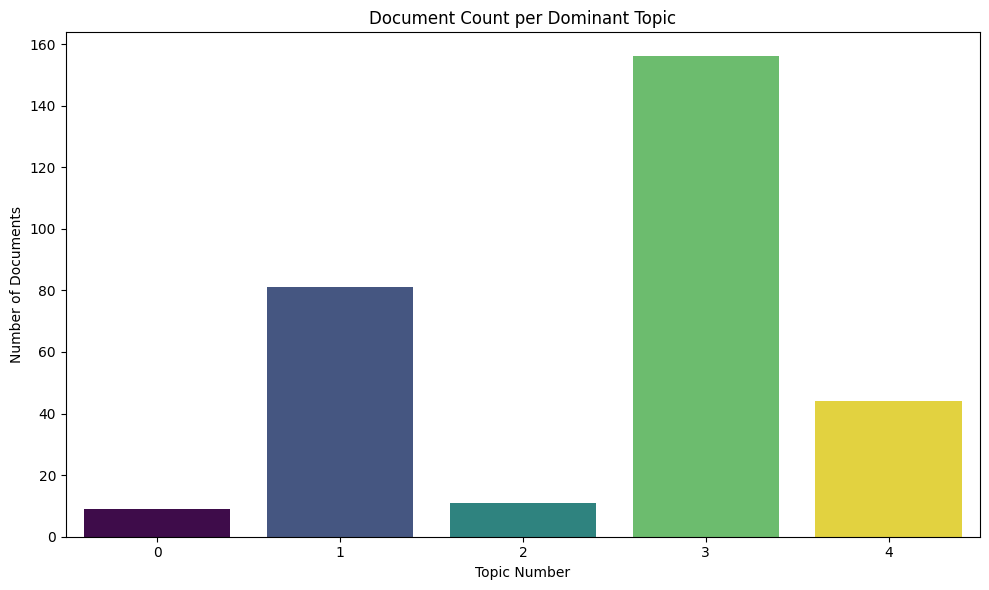

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.countplot(data=df_topic_doc, x='Dominant_Topic', hue='Dominant_Topic', palette='viridis', legend=False)
plt.title('Document Count per Dominant Topic')
plt.xlabel('Topic Number')
plt.ylabel('Number of Documents')
plt.tight_layout()


plt.savefig('dominant_topic_distribution.png', dpi=300)  

plt.show()


In [63]:
prompt_template = """
You are an expert in topic modeling. Given the top keywords of a topic from LDA, assign a short and meaningful name that best represents the topic.

Keywords: {keywords}

Topic Name:
"""


In [ ]:
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain


topics = [
    ['police', 'said', 'bus', 'road', 'news', 'fire', 'accident', 'students', 'also', 'area'],
    ['road', 'said', 'bus', 'news', 'police', 'killed', 'accidents', 'daily', 'star', 'dhaka'],
    ['said', 'road', 'news', 'accident', 'blood', 'people', 'daily', 'star', 'transport', 'police'],
    ['injured', 'said', 'police', 'killed', 'upazila', 'bus', 'news', 'road', 'people', 'around'],
    ['police', 'said', 'hospital', 'bus', 'news', 'injured', 'dhaka', 'around', 'road', 'star']
]




prompt_template = PromptTemplate(
    input_variables=["topic_keywords"],
    template="Given the following keywords from a topic model:\n{topic_keywords}\n\nGive a short and descriptive innovative name for this topic so that no two topic name coincide for news paper."
)

llm_chain = LLMChain(llm=llm, prompt=prompt_template)

for i, topic_keywords in enumerate(topics, start=1):
    result = llm_chain.run(topic_keywords=topic_keywords)
    print(f"Topic {i} name: {result}")


Topic 1 name: Based on the keywords, I would suggest the following innovative topic name:

**"Safety Watch"**

This name captures the essence of the topic, which appears to be related to incidents, accidents, and safety concerns in a specific area, involving authorities like the police and fire department. The name is short, descriptive, and unique, making it unlikely to coincide with other topic names in a newspaper.
Topic 2 name: Based on the keywords, I would suggest the following topic name:

**"Wheels of Tragedy"**

This name captures the essence of the topic, which appears to be related to road accidents, bus crashes, and police involvement, resulting in fatalities. The phrase "Wheels of Tragedy" is short, memorable, and evocative, conveying a sense of danger and loss. It's also unique and unlikely to coincide with other topic names in a newspaper.
Topic 3 name: Based on the keywords, I would suggest the following topic name:

**"StreetBeat"**

This name captures the essence of t

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\palla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\palla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(1, 0.99211526)]
[(1, 0.4032356), (4, 0.5931325)]
[(1, 0.6277458), (4, 0.36709115)]
[(1, 0.7988564), (4, 0.19399707)]
[(1, 0.9931043)]
[(1, 0.99492687)]
[(1, 0.6596432), (2, 0.333467)]
[(1, 0.990806)]
[(0, 0.19351533), (1, 0.80426764)]
[(1, 0.998491)]
[(1, 0.99748915)]
[(1, 0.99198836)]
[(1, 0.99476373)]
[(0, 0.99282795)]
[(3, 0.71479523), (4, 0.27971798)]
[(1, 0.99769396)]
[(1, 0.6192971), (3, 0.37932882)]
[(0, 0.9982329)]
[(0, 0.9938074)]
[(0, 0.99076855)]
[(0, 0.012793973), (1, 0.85711056), (4, 0.12913525)]
[(1, 0.99481684)]
[(1, 0.41592088), (4, 0.5788032)]
[(1, 0.9909145)]
[(1, 0.987942)]
[(1, 0.99281794)]
[(4, 0.99863476)]
[(1, 0.98830056)]
[(1, 0.68149614), (4, 0.30968472)]
[(1, 0.98431814), (4, 0.014846024)]
[(1, 0.80665225), (3, 0.18556625)]
[(1, 0.80713195), (3, 0.18905903)]
[(1, 0.99314314)]
[(1, 0.99278367)]
[(1, 0.033029385), (4, 0.96529156)]
[(1, 0.9967439)]
[(1, 0.99487776)]
[(1, 0.998253)]
[(0, 0.9934094)]
[(0, 0.8645742), (1, 0.13045037)]
[(1, 0.8508848), (3, 0.142548

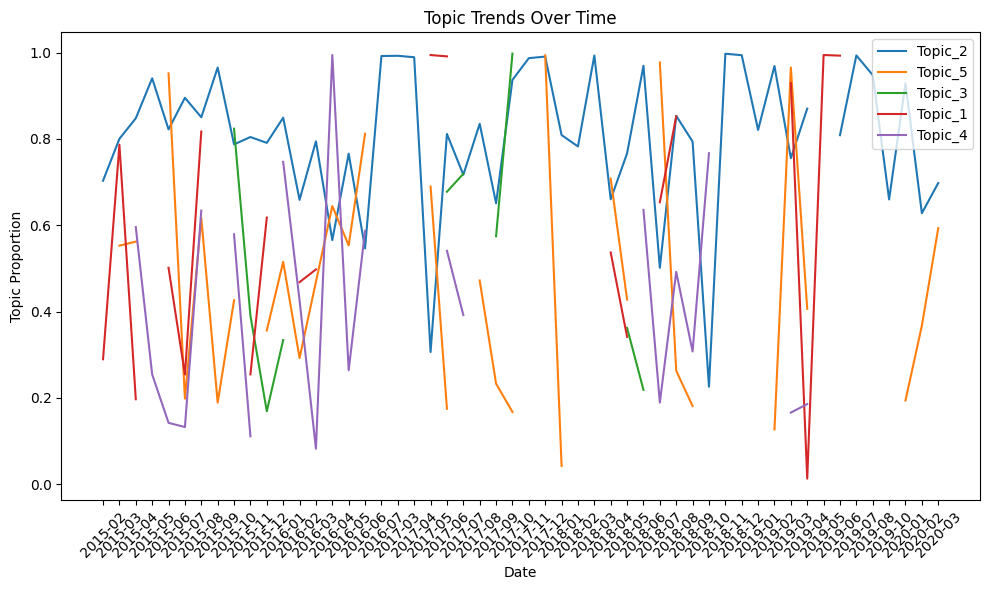

In [ ]:
import pandas as pd
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

df = pd.read_csv("input.csv")

df['Combined_Text'] = df[['Headline', 'Content']].fillna('').agg(' '.join, axis=1)

df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

texts = df['Combined_Text'].apply(
    lambda x: [word.lower() for word in word_tokenize(x) if word.isalpha() and word.lower() not in stopwords.words('english')]
)

dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)


topic_distributions = []
for doc in corpus:
    topic_probs = lda_model.get_document_topics(doc)
    
    
    print(topic_probs)  

    
    topic_probs_dict = {}
    for prob in topic_probs:
        
        topic_probs_dict[f"Topic_{prob[0] + 1}"] = prob[1]
    
    topic_distributions.append(topic_probs_dict)

topic_df = pd.DataFrame(topic_distributions)


topic_df['Date'] = df['Date']


topic_trends = topic_df.groupby(topic_df['Date'].dt.to_period('M')).mean()


plt.figure(figsize=(10, 6))
for topic in topic_trends.columns:
    if topic != 'Date':
        plt.plot(topic_trends.index.astype(str), topic_trends[topic], label=topic)

plt.title('Topic Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Topic Proportion')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

plt.savefig('TimeSeriesAccident.png', dpi=300)  

plt.show()
